In [5]:
from importlib import reload
import os
import data_processing as dp
import numpy as np
import pandas as pd
dp = reload(dp)

In [2]:
def dir_filter(directory):
    dir_name = directory.name
    name_index = dir_name.split("_")
    return name_index[0] == "search"

root = os.getcwd()
output_path = os.path.join(root, "..", "output")
dirs = list(os.scandir(output_path))

# observables to investigate
#obs_names = ["dual_graph_shell", "dual_tree_shell", "edge_degree", "edge_detour", "edge_freq", "edge_middle", "triangle_detour", "triangle_freq", "triangle_middle", "vertex_count", "vertex_degree", "vertex_tree_shell", "volume"]
obs_names = ["dual_dist_prof", "edge_degree", "edge_detour", "edge_middle", "triangle_detour", "triangle_middle", "vertex_count", "vertex_degree", "volume"]

# build a container
all_data = np.empty((len(obs_names), 6), dtype=object)
for i in range(all_data.shape[0]):
    for j in range(all_data.shape[1]):
        all_data[i][j] = []

# gather the data
for directory in dirs:
    if dir_filter(directory):
        dirname = directory.name

        for i in range(len(obs_names)):
            obs_data = dp.DataSet.load(dirname, obs_names[i])
            obs_max = obs_data.transform(trans="max")
            obs_parity = obs_data.transform(trans="parity")
            all_data[i][0].append(obs_data.histogram())
            all_data[i][1].append(obs_max.histogram())
            all_data[i][2].append(obs_max.bootstrap("mean", 1000))
            all_data[i][3].append(obs_max.bootstrap("std", 1000))
            all_data[i][4].append(obs_parity.bootstrap("mean", 1000))
            all_data[i][5].append(obs_parity.bootstrap("std", 1000))
        print("And another one!")


And another one!
And another one!
And another one!
And another one!
And another one!
And another one!
And another one!
And another one!
And another one!
And another one!
And another one!
And another one!
And another one!
And another one!
And another one!
And another one!
And another one!
And another one!
And another one!
And another one!
And another one!
And another one!
And another one!
And another one!
And another one!
And another one!
And another one!
And another one!
And another one!
And another one!
And another one!
And another one!
And another one!
And another one!
And another one!
And another one!
And another one!
And another one!
And another one!
And another one!
And another one!
And another one!
And another one!
And another one!
And another one!
And another one!
And another one!
And another one!
And another one!
And another one!
And another one!
And another one!
And another one!
And another one!
And another one!
And another one!
And another one!
And another one!
And another on

   volume     kappa       value
0     200  0.274073   10.585242
1     400 -0.037024   19.968369
2     800 -0.187333   34.618460
3    1600 -0.458696   65.139026
4    3200 -0.670733  120.380026
5    6400 -0.753691  234.538438


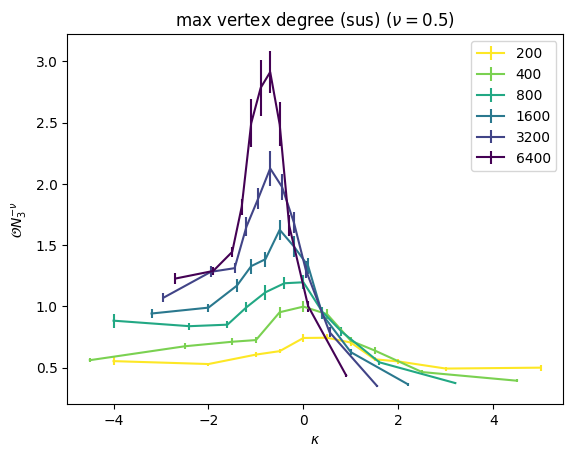

In [8]:
df = dp.process_volume_kappa(all_data[7][3])
dp.write_data_frame(df, "test")
df_peak = dp.get_peak_data(df)
print(df_peak)
dp.volume_kappa_plot(df, 0.5, title="max vertex degree (sus)")

In [1]:
dp.volume_kappa_plot(all_data[6][2], 0.5, title="Max vertex degree (mean)")
dp.volume_kappa_plot(all_data[6][3], 0.5, title="Max vertex degree (std)")
dp.volume_kappa_plot(all_data[1][2], 0.5, title="Max edge degree (mean)")
dp.volume_kappa_plot(all_data[1][3], 0.5, title="Max edge degree (std)")


NameError: name 'dp' is not defined

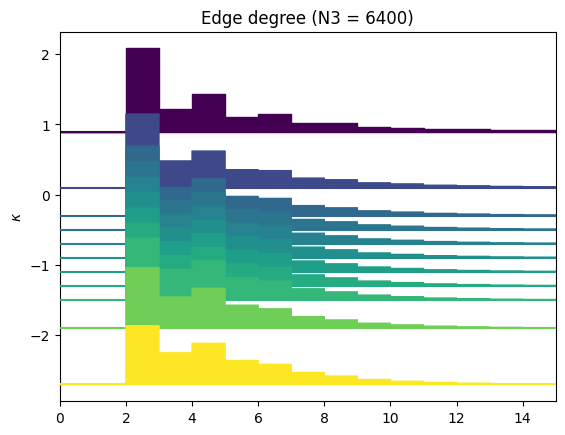

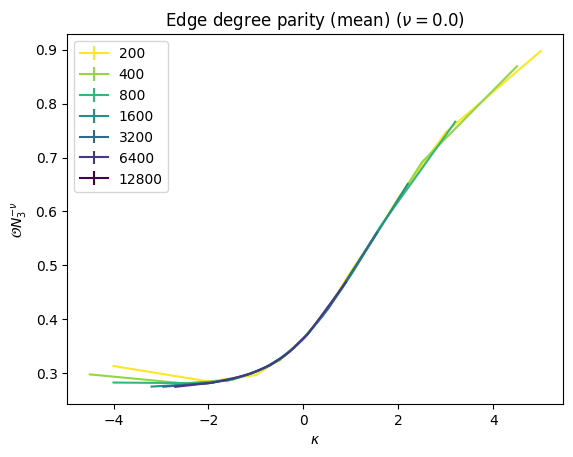

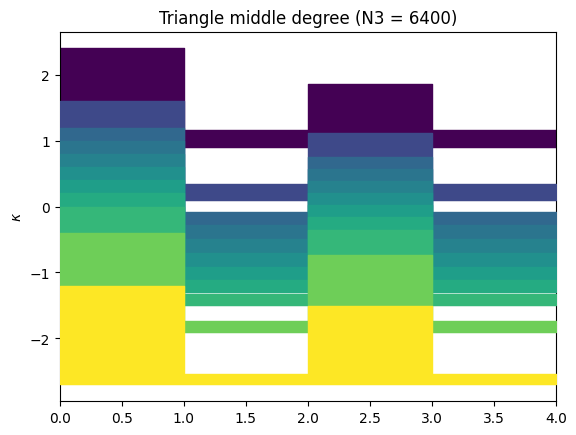

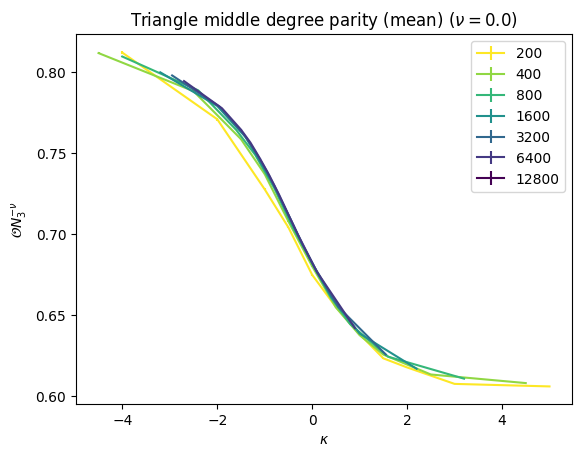

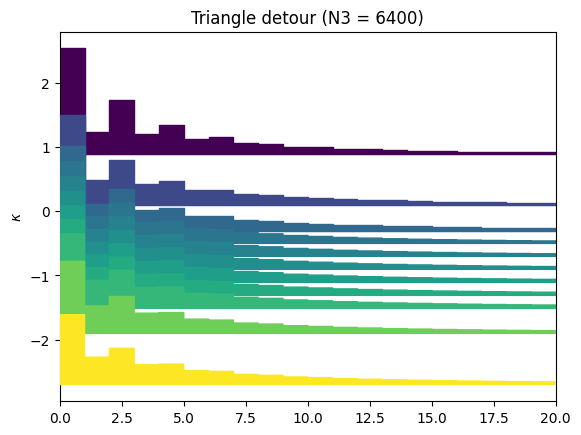

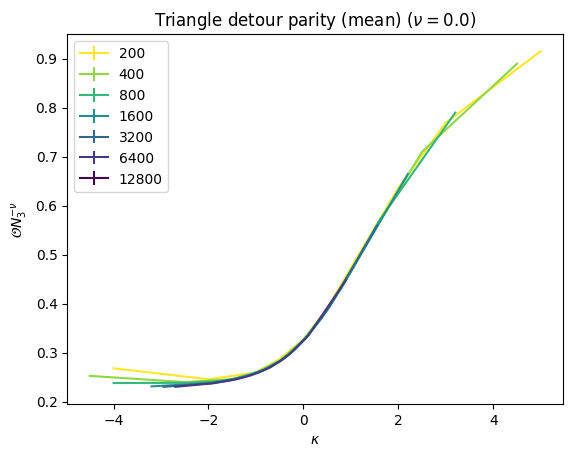

In [5]:

dp.hist_plot(all_data[1][0], 6400, 15, 3, title="Edge degree")
dp.volume_kappa_plot(all_data[1][4], 0.0, title="Edge degree parity (mean)")
dp.hist_plot(all_data[5][0], 6400, 4, 3, title="Triangle middle degree")
dp.volume_kappa_plot(all_data[5][4], 0.0, title="Triangle middle degree parity (mean)")
dp.hist_plot(all_data[4][0], 6400, 20, 5, title="Triangle detour")
dp.volume_kappa_plot(all_data[4][4], 0.0, title="Triangle detour parity (mean)")


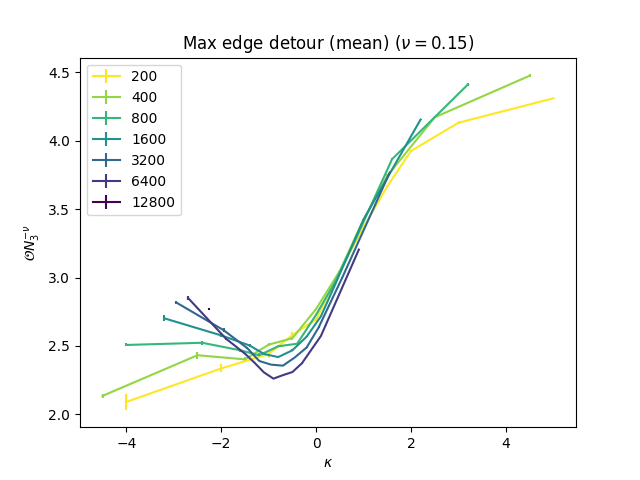

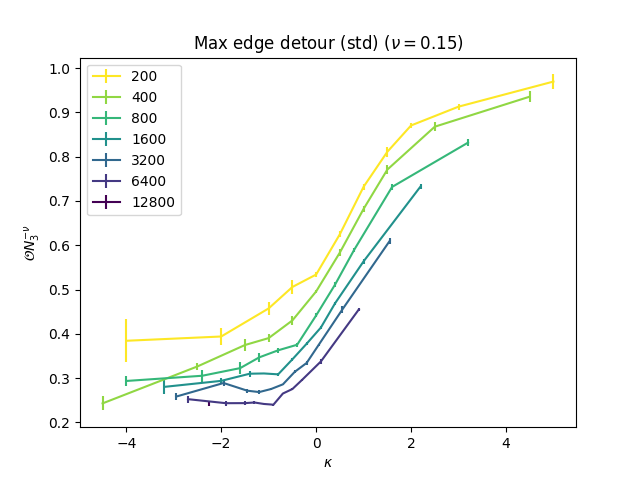

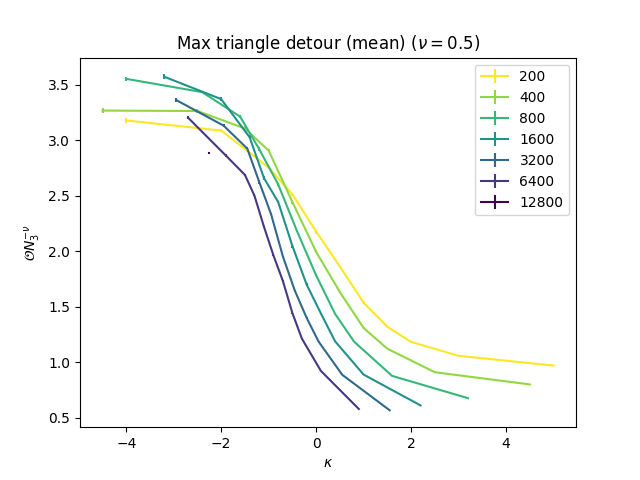

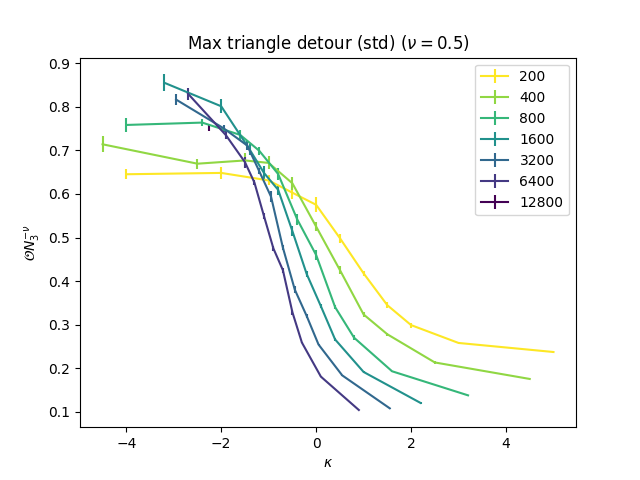

In [13]:

dp.volume_kappa_plot(all_data[2][2], 0.15, title="Max edge detour (mean)")
dp.volume_kappa_plot(all_data[2][3], 0.15, title="Max edge detour (std)")
dp.volume_kappa_plot(all_data[4][2], 0.5, title="Max triangle detour (mean)")
dp.volume_kappa_plot(all_data[4][3], 0.5, title="Max triangle detour (std)")

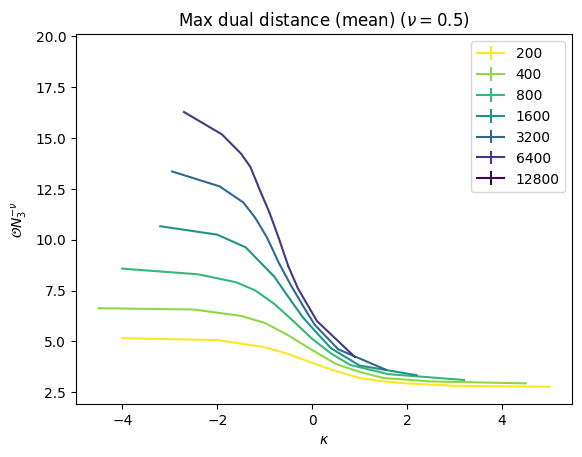

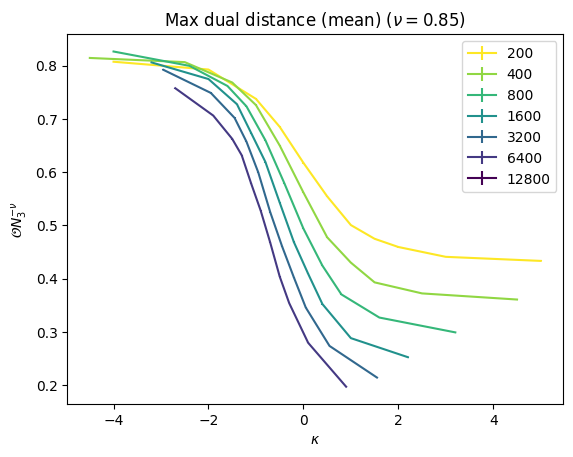

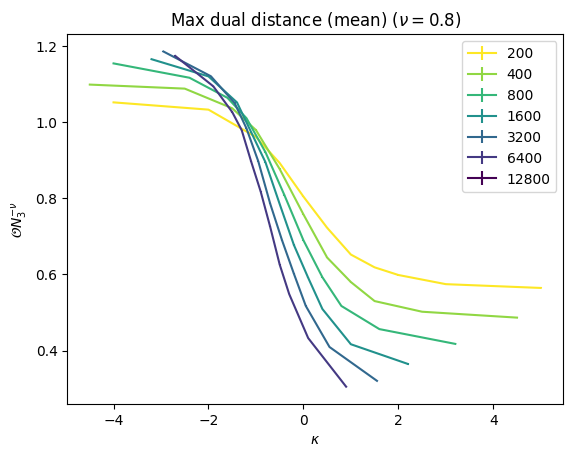

In [7]:
dp.volume_kappa_plot(all_data[0][2], 0.5, title="Max dual distance (mean)")
dp.volume_kappa_plot(all_data[0][2], 0.85, title="Max dual distance (mean)")
dp.volume_kappa_plot(all_data[0][2], 0.8, title="Max dual distance (mean)")


In [ ]:
%matplotlib widget
for i in range(len(obs_names)):
    #dp.hist_plot(all_data[i][0], 6400, xmax_list[i], 50)
    #dp.hist_plot(all_data[i][1], 6400, xmax_list[i], 50)
    df_max_mean = dp.process_volume_kappa(all_data[i][2])
    df_max_sus = dp.process_volume_kappa(all_data[i][3])
    df_par_mean = dp.process_volume_kappa(all_data[i][4])
    df_par_sus = dp.process_volume_kappa(all_data[i][5])
    dp.write_data_frame(df_max_mean, f"{obs_names[i]}_max")
    dp.write_data_frame(df_max_sus, f"{obs_names[i]}_max_sus")
    dp.write_data_frame(df_par_mean, f"{obs_names[i]}_par")
    dp.write_data_frame(df_par_sus, f"{obs_names[i]}_par_sus")
    dp.volume_kappa_plot(df_max_mean, 0.5, title=f"max {obs_names[i]}")
    dp.volume_kappa_plot(df_max_sus, 0.5, title=f"max {obs_names[i]} - susceptibility")
    dp.volume_kappa_plot(df_par_mean, 0.5, title=f"par {obs_names[i]}")
    dp.volume_kappa_plot(df_par_sus, 0.5, title=f"par {obs_names[i]} - susceptibility")